Installing Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullahsabir","key":"aafa727ea59b2ab4cd44a31ed1dfbe4c"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json

Unzipping the predicted set

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip "/content/drive/My Drive/Test_data.zip" -d "/content/drive/My Drive/"

Unzipping the Dataset

In [6]:
from zipfile import ZipFile
file_name ="intel-image-classification.zip"


with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')




Done


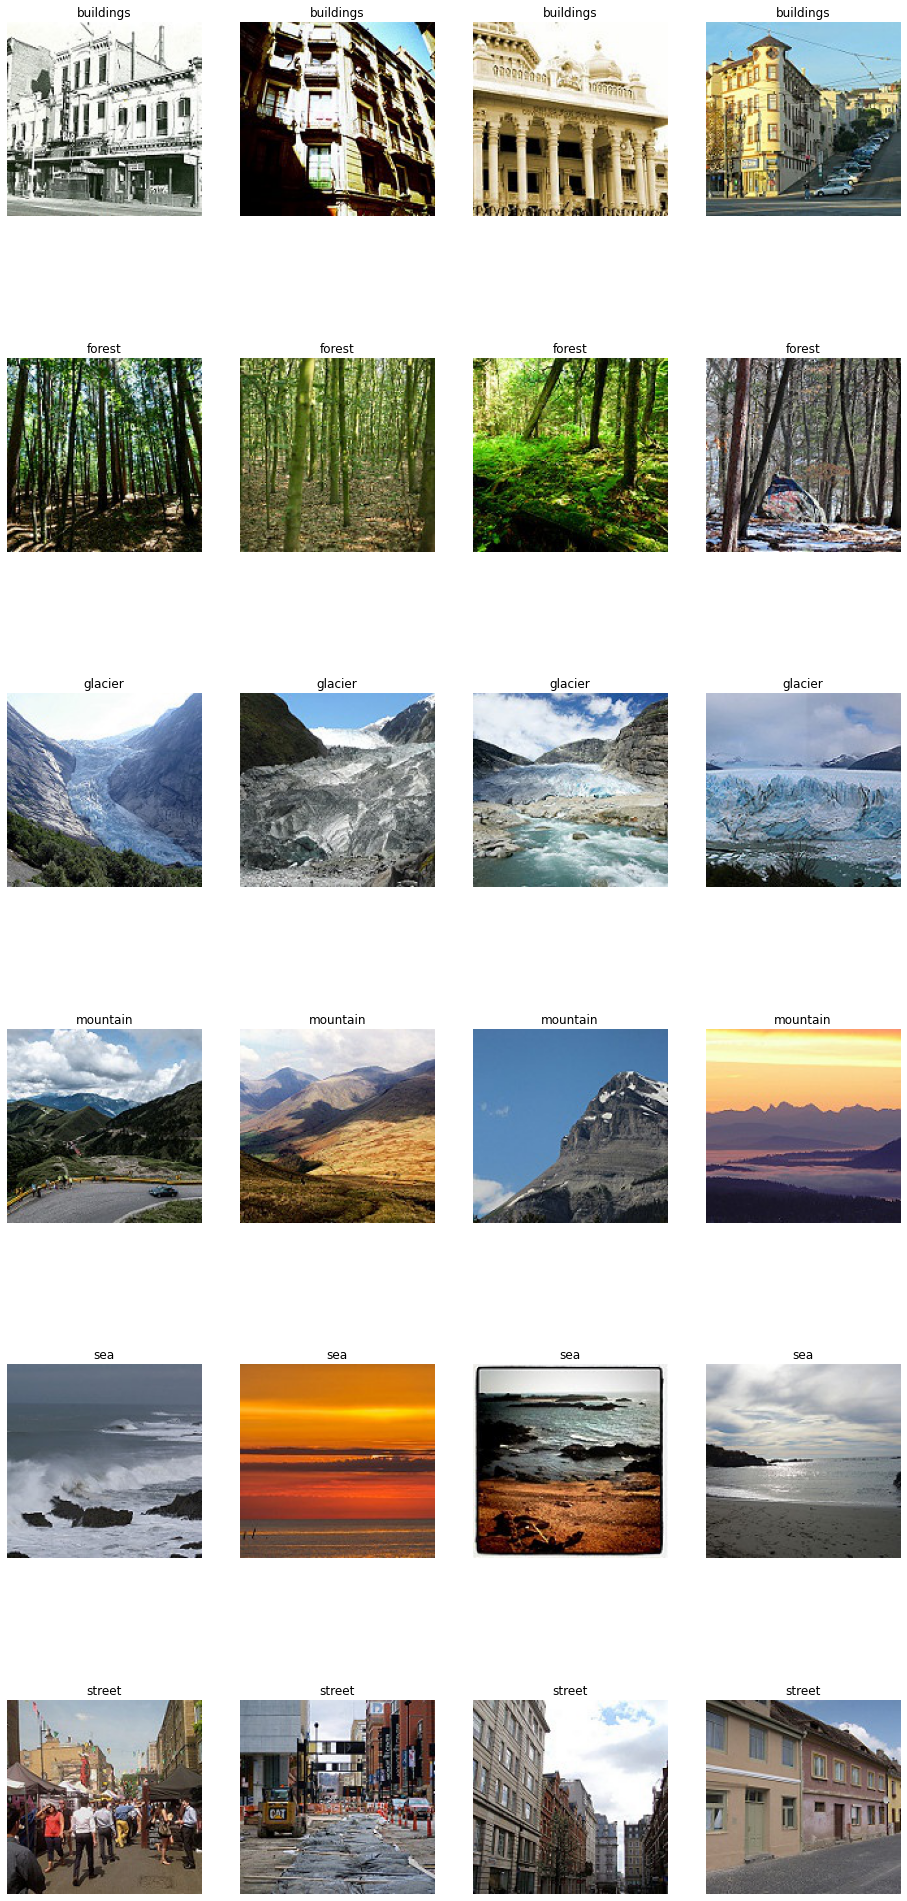

In [7]:
import numpy as np 
import cv2
import os
import zipfile
import pandas as pd
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 6X4 configuration. 

nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/content/seg_train/seg_train/'+classes[0]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/content/seg_train/seg_train/'+classes[1]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/content/seg_train/seg_train/'+classes[2]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/content/seg_train/seg_train/'+classes[3]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/content/seg_train/seg_train/'+classes[4]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/content/seg_train/seg_train/'+classes[5]+'/' ,fname) for fname in os.listdir('/content/seg_train/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

# Introducing Data Augmentation

In [54]:

#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)

"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.01,
      zoom_range=[0.1, 1.5],
      horizontal_flip=True,
      fill_mode='nearest',
      zca_whitening=True,
      brightness_range=[0.1, 2]
)
"""

train_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      shuffle=False,
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    '/content/seg_test/seg_test/', 
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
    class_mode='sparse',
    seed=2209
) 

pred_datagen = ImageDataGenerator(rescale = 1./255.)
pred_generator = pred_datagen.flow_from_directory(
    '/content/drive/MyDrive/seg_pred/seg_pred/', 
    target_size=(150,150),
    batch_size=1,
    shuffle=False,
    class_mode='sparse',
    seed=2209
) 

test1_datagen = ImageDataGenerator(rescale = 1./255.)
test1_generator = test1_datagen.flow_from_directory(
    '/content/seg_test/seg_test/', 
    target_size=(150,150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=2209
) 


Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [55]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf
tf.random.set_seed(SEED) 

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)

rn.seed(SEED)

# Visual Geometry  Group (VGG16)

In [56]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras


model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax"))

# Training the Model

In [57]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model.fit_generator(
  train_generator,
  steps_per_epoch=int(12632/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reduce],
  verbose=1
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
197/197 [==============================] - 109s 544ms/step - loss: 3325.5507 - accuracy: 0.1746 - val_loss: 1.7922 - val_accuracy: 0.1786
Epoch 2/50
197/197 [==============================] - 106s 538ms/step - loss: 1.9311 - accuracy: 0.1771 - val_loss: 1.7919 - val_accuracy: 0.1868
Epoch 3/50
197/197 [==============================] - 107s 540ms/step - loss: 1.7910 - accuracy: 0.1792 - val_loss: 1.7906 - val_accuracy: 0.1786
Epoch 4/50
197/197 [==============================] - 106s 537ms/step - loss: 4.2738 - accuracy: 0.1765 - val_loss: 1.7925 - val_accuracy: 0.1339
Epoch 5/50
197/197 [==============================] - 105s 534ms/step - loss: 2.0580 - accuracy: 0.1840 - val_loss: 1.7920 - val_accuracy: 0.1689
Epoch 6/50
197/197 [==============================] - 106s 536ms/step - loss: 1.8685 - accuracy: 0.1841 - val_loss: 1.7925 - val_accuracy: 0.1868
Epoch 7/50
197/197 [==============================] - 107s 543ms/step - loss: 2.0999 - accuracy: 0.2176 - val_loss: 1.411

# Accuracy

In [62]:
accuracy=model.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the validation set: ',accuracy[1])
accuracy1=model.evaluate_generator(pred_generator, steps=len(pred_generator), callbacks=[reduce],verbose=2)
print('Accuracy of the model on the Test set: ',accuracy1[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 - 0s - loss: 0.2675 - accuracy: 0.8906
Accuracy of the model on the validation set:  0.890625
7301/7301 - 52s - loss: 1.2676 - accuracy: 0.8696
Accuracy of the model on the Test set:  0.8696069121360779


# Plotting the Results

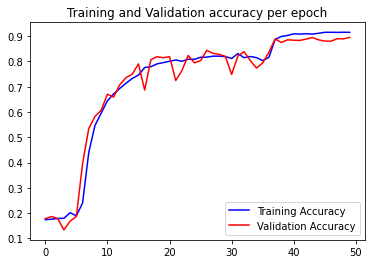

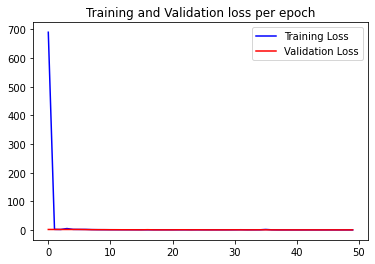

In [59]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation accuracy per epoch')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation loss per epoch')
plt.legend()
plt.show()

Saving the Model

In [60]:
model.save('/content/drive/MyDrive/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assets


# Confusion Matrix

In [61]:
filenames = pred_generator.filenames
nb_samples = len(filenames)

y_predict = model.predict_generator(pred_generator,steps = nb_samples)
#print(type(pred_generator.labels))
#print(y_predict.argmax(axis=-1))
from sklearn.metrics  import classification_report
print(classification_report(y_true=pred_generator.labels, y_pred=y_predict.argmax(axis=-1), target_names=['0','1','2','3','4','5']))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1144
           1       0.96      0.98      0.97      1166
           2       0.88      0.77      0.82      1330
           3       0.79      0.84      0.81      1297
           4       0.86      0.87      0.86      1128
           5       0.90      0.88      0.89      1236

    accuracy                           0.87      7301
   macro avg       0.87      0.87      0.87      7301
weighted avg       0.87      0.87      0.87      7301

